# MALIGNANT COMMENTS CLASSIFICATION

### Problem Statement:
The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

There are two dataset train and test.

Train dataset: The training set which contains comments with their binary labels.
Test dataset: The test set for which the predictions are to be done. It includes id and comments_text.

### Importing necessary libraries

In [1]:
!pip install lightgbm

In [2]:
import numpy as np
import pandas as pd
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy as stats
# Evaluation Metrics
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve,accuracy_score,roc_auc_score,hamming_loss, log_loss
# Defining different algorithms
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Importing Train and Test datasets

In [12]:
# Reading train.csv file
train_df = pd.read_csv("train.csv")
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [13]:
# Reading test.csv file
test_df = pd.read_csv("test.csv")
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


Here we are provided with train and test datasets. Both the datatset provides information about the online malignant comments. Here we can notice first 5 and last 5 rows of the dataset. The training dataset contains 159571 rows and 8 columns and test dataset contains 153164 rows and 2 columns.

The train dataset is comprised of both dependent variable (target) and independent variables. In train dataset the label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment. Since the target variable is consists of 2 classes 0 and 1 which can be termed as categorical in nature which makes this to be a "Classification Problem".

The test dataset contains only independent variables.

So, I will use train dataset for building our model and then will use the test dataset for getting prediction from the trained best model.

### Data Description (Attribute Information)

### Exploratory Data Analysis (EDA)

In [14]:
# Checking the dimensions of the dataset
print("There are {} Rows and {} Columns in train dataframe".format(train_df.shape[0], train_df.shape[1]))
print("There are {} Rows and {} Columns in test dataframe".format(test_df.shape[0], test_df.shape[1]))

There are 159571 Rows and 8 Columns in train dataframe
There are 153164 Rows and 2 Columns in test dataframe


The train dataset contains 159571 rows and 8 columns. This train dataset contains both dependent and independent variables. The test dataset contains 153164 rows and 2 columns. This test dataset contains only independent variables and there is no label.

In [15]:
# Checking the column names in the train and test dataset
print("Columns present in train dataset:\n",train_df.columns)
print("\n")
print("Columns present in test dataset:\n",test_df.columns)

Columns present in train dataset:
 Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')


Columns present in test dataset:
 Index(['id', 'comment_text'], dtype='object')


These are the columns present in both train dataset and test dataset. We can observe the test dataset doest not contains any label.

In [16]:
# To get good overview of the train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [17]:
# To get good overview of the test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


This info() method gives the information about the dataset which includes indexing type, column type, no-null values and memory usage.

The train dataset contains 2 different types of data, integer and object. There are 2 columns with object datatype.

The test dataset contains only object data type. We will encode the object datatypes using appropriate encoding techniques before building machine learning models.

In [18]:
# Checking for null values
print("Null values in train dataset: \n", train_df.isnull().sum())
print("\nNull values in test dataset: \n", test_df.isnull().sum())

Null values in train dataset: 
 id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

Null values in test dataset: 
 id              0
comment_text    0
dtype: int64


Using "isnull" method we can able to observe sum of missing values present in the dataset. It looks like there are no null values present. So no need to worry much.

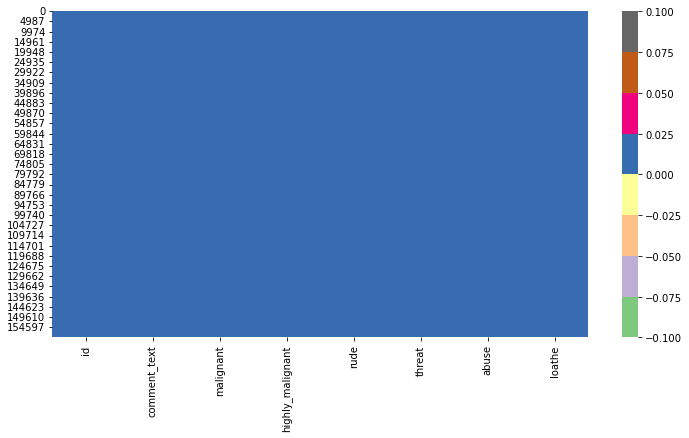

In [19]:
# Let's visualize the null values clearly in train dataset using heat map
plt.figure(figsize=(12,6))
sns.heatmap(train_df.isnull(), cmap="Accent")
plt.show()

It is clear from the heat map that there are no null values in any of the column.

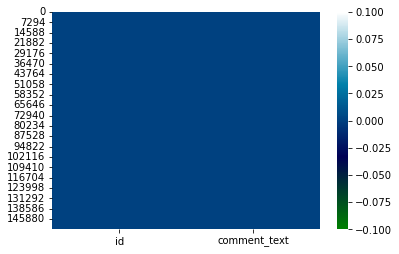

In [20]:
# Let's visualize the null values clearly in test dataset using heat map
sns.heatmap(test_df.isnull(), cmap="ocean")
plt.show()

It is clear from the heat map that there are no null values in any of the column.

In [21]:
#lets check for duplicate values if there are any
print("Duplicate entries in the train dataset:", train_df.duplicated().sum())
print("Duplicate entries in the test dataset:", test_df.duplicated().sum())

Duplicate entries in the train dataset: 0
Duplicate entries in the test dataset: 0


It is good to see that there are no duplicate etries present in the datasets.

In [22]:
# Checking number of unique values in each column of dataset
train_df.nunique().to_frame("No of Unique Values")

,No of Unique Values
id,159571
comment_text,159571
malignant,2
highly_malignant,2
rude,2
threat,2
abuse,2
loathe,2


Above are the number of unique values present in the columns of the train dataset.

In [23]:
# Dropping id column 
train_df.drop(["id"],axis=1,inplace = True)

I have dropped id column as it was containing only unique values for every row which we don't want for predictions.

In [24]:
# Check value counts for each feature

cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print("Value Counts of {} :".format(col, train_df[col].nunique()))
    print(train_df[f'{col}'].value_counts())
    print('*'*100)

Value Counts of malignant :
0    144277
1     15294
Name: malignant, dtype: int64
****************************************************************************************************
Value Counts of highly_malignant :
0    157976
1      1595
Name: highly_malignant, dtype: int64
****************************************************************************************************
Value Counts of rude :
0    151122
1      8449
Name: rude, dtype: int64
****************************************************************************************************
Value Counts of threat :
0    159093
1       478
Name: threat, dtype: int64
****************************************************************************************************
Value Counts of abuse :
0    151694
1      7877
Name: abuse, dtype: int64
****************************************************************************************************
Value Counts of loathe :
0    158166
1      1405
Name: loathe, dtype: int64
*******************

These are the value counts of the columns present in the train dataset.

### Description of Dataset

In [25]:
# Statistical summary of dataset
train_df.describe()

,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This gives the statistical information of the dataset. The summary of this dataset looks perfect since there is no negative/ invalid values present. It gives the summary of numerical data.

From the above description we can observe that the counts of every column is same which means there are no missing values present in the dataset.

The minimum and maximum values of the features are same, they have 0 and 1 respectively.

The mean and standard deviation is nearly 0-1 of all the attributes in the training dataset.

By summarizing the data we can say there are no outliers but the data is skewed to right in all the columns which means presence of skewness. Since we have only categorical columns there is no need to remove outliers or skewness.

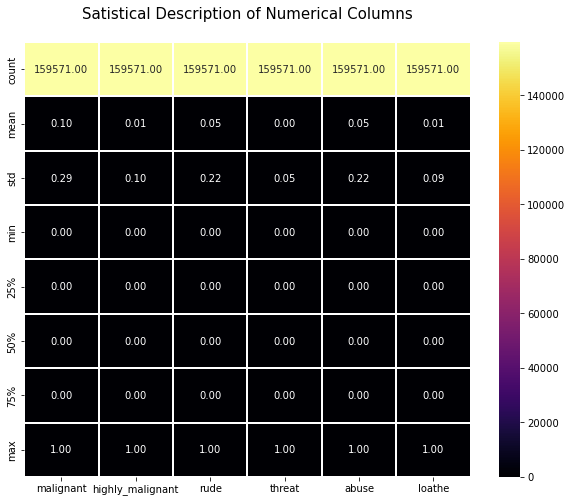

In [26]:
# Visualizing the statistical description of numeric datatype columns

plt.figure(figsize = (10,8))
sns.heatmap(round(train_df.describe()[0:],2), linewidth = 2, annot= True, fmt = ".2f", cmap="inferno")
plt.title("Satistical Description of Numerical Columns\n",fontsize=15)

plt.show()

From the heat map we can observe the statistical summary of the numerical features present in the dataset.

In [27]:
# Checking the statistical summary of the test dataset
test_df.describe()

,id,comment_text
count,153164,153164
unique,153164,153039
top,00001cee341fdb12,#NAME?
freq,1,126


Above is the statistical description of test datset.

###### Lets see how the comments look like in train dataset

In [28]:
train_df['comment_text'].value_counts()

Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

By observing the value counts of the comments we can say that there are many words, numbers, as well as punctuations which are not important for our predictions. So we need to do lot of text processing.

In [29]:
#Checking percentage of good and bad comments from all features combiningly in dataset 
good_comments = train_df[(train_df['malignant']!=1) & (train_df['highly_malignant']!=1) & (train_df['rude']!=1) & 
                            (train_df['threat']!=1) & (train_df['abuse']!=1) & (train_df['loathe']!=1)]
percent=len(good_comments)/len(train_df)*100
print('Percentage of positive comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of positive comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


We can observe about 90% of the comments are positive and only 10% of the comments falls down into negative.

In [30]:
# Check percentage of comments that are toxic compared to normal comments
cols=['malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe',]
for col in cols:
    print("Percentage of toxic comments compared to normal comments in {} :".format(col, train_df[col].value_counts(normalize=True)*100))
    print(train_df[f'{col}'].value_counts(normalize=True)*100)
    print('*'*100)

Percentage of toxic comments compared to normal comments in malignant :
0    90.415552
1     9.584448
Name: malignant, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in highly_malignant :
0    99.000445
1     0.999555
Name: highly_malignant, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in rude :
0    94.705178
1     5.294822
Name: rude, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in threat :
0    99.700447
1     0.299553
Name: threat, dtype: float64
****************************************************************************************************
Percentage of toxic comments compared to normal comments in ab

As we know 1 indicates the good or neutral comments and 0 indicates the negative comments. So, from the above we can infer that more than 90% of the comments in all the columns fall down into negative or bad and only few comments are considered to be good.

### Feature Engineering

I am creating new column "label" which is the sum of all the target features.

In [31]:
# Creating a new feature having negative and non negative comments for the particular comment.
cols = [ 'malignant', 'highly_malignant', 'rude', 'threat','abuse', 'loathe']
train_df[cols].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [32]:
# Label column is the sum of all the target features
train_df['label'] = train_df[cols].sum(axis=1)
train_df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


I have created a new feature "label" which is containing both good and bad comments.

In [33]:
train_df.label.value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

We can see that 0 has more number of weightage, whereas 6 has the lesser weightage.

In [34]:
# Scaling the label column that is converting it from multiple labels into binary
train_df['label'] = train_df['label'] >0
train_df['label'] = train_df['label'].astype(int)
train_df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,alignment on this subject and which are contra...,0,0,0,0,0,0,0


In [35]:
# Checking value counts for label after scaling
train_df.label.value_counts()

0    143346
1     16225
Name: label, dtype: int64

Now label has two classes 0 and 1, where 0 indicates good/neutral comments and 1 indicates bad comments.

In [36]:
# Creating new column for length of comments
train_df['comment_length']=train_df.comment_text.str.len()
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116



I have created new column "comment_length" which contains the length of the comment text.

In [37]:
# Adding new column comment_length to check length of comment_text characters in test data
test_df['comment_length']=test_df.comment_text.str.len()
test_df

,id,comment_text,comment_length
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,367
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,00017563c3f7919a,":If you have a look back at the source, the in...",205
4,00017695ad8997eb,I don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the...",502


In test dataset also I have created new column "comment_length".

## Data Visualization

### Univariate Analysis

In [38]:
# Storing the number of counts for every target label
counts=train_df.iloc[:,1:].sum()
counts

malignant              15294
highly_malignant        1595
rude                    8449
threat                   478
abuse                   7877
loathe                  1405
label                  16225
comment_length      62893130
dtype: int64

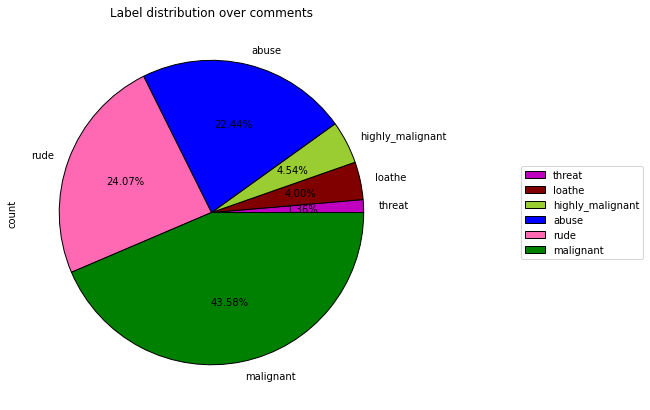

In [39]:
#  Label distribution comments using pie chart
labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
colors = ["m", "maroon","yellowgreen","blue","hotpink","g"]

x = train_df[labels].sum().to_frame().rename(columns={0: 'count'}).sort_values('count')
x.plot.pie(y = 'count', title = 'Label distribution over comments',autopct='%.2f%%', colors=colors,figsize = (7,7),
          wedgeprops = {'linewidth':1, 'edgecolor':'k'})\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

#### Observations:
From the pie chart we can notice approximately 43% of the comments are malignant, 24% of the comments are rude and 22% are abuse. The count of malignant comments are high compared to other type of comments and the count of threat comments are very less.

0    143346
1     16225
Name: label, dtype: int64


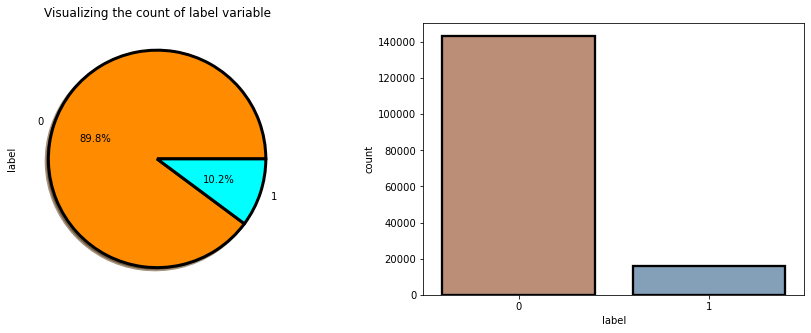

In [40]:
# Visualizing count of negative and non negative comments combining 
print(train_df['label'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["darkorange", "cyan"]
train_df['label'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':3, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of label variable')
ax = sns.countplot('label', data=train_df, ax=ax[1],palette="twilight_shifted_r",linewidth=2.3, edgecolor="k")
plt.show()

#### Observations:
From the above plots we can observe the count of negative comments are high compared to the non negative comments. Here around 90% of the comments are turned out to be a negative comments and only 10% of them are considered to be positive or neutral comments. We can also observe the data imbalance issue here, we need to balance the data.

0    144277
1     15294
Name: malignant, dtype: int64


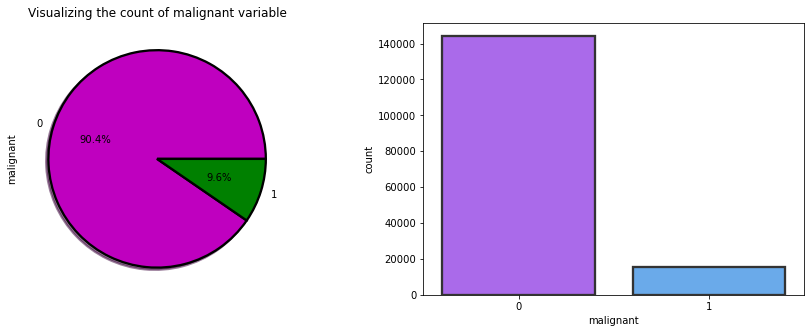

In [41]:
# Visualizing count of malignant and non malignant comments
print(train_df['malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["m", "green"]
train_df['malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,colors=colors,
                                              wedgeprops = {'linewidth':2.3, 'edgecolor':'k'},
                                              title = 'Visualizing the count of malignant variable')
ax = sns.countplot('malignant', data=train_df, ax=ax[1],palette="cool_r",linewidth=2.3, edgecolor=".2")
plt.show()

#### Observations:
From the above plots we can observe the count of malignant comments are high compared to non malignant comments. That is around 90% of the comments are malignant and only 9.6% of the comments are good.

0    157976
1      1595
Name: highly_malignant, dtype: int64


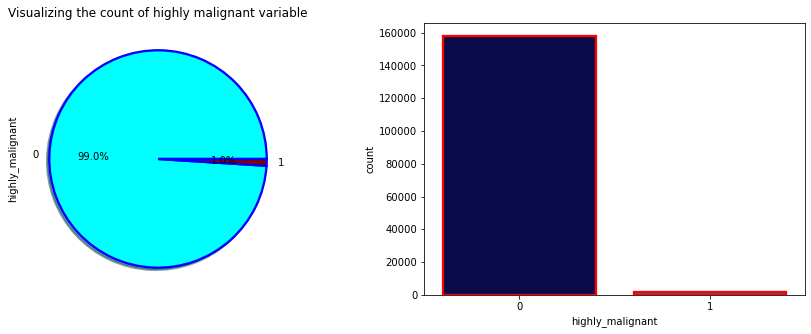

In [42]:
# Visualizing count of highly malignant and normal comments
print(train_df['highly_malignant'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["cyan", "maroon"]
train_df['highly_malignant'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2.3, 'edgecolor':'b'},
                                                     colors=colors,title = 'Visualizing the count of highly malignant variable')
ax = sns.countplot('highly_malignant', data=train_df, ax=ax[1],palette="ocean",linewidth=2.3, edgecolor="r")
plt.show()

#### Observations:
From the plot we can observe the count of highly malignant comments are very high which is about 99% and only 1% of the comments are normal.

0    151122
1      8449
Name: rude, dtype: int64


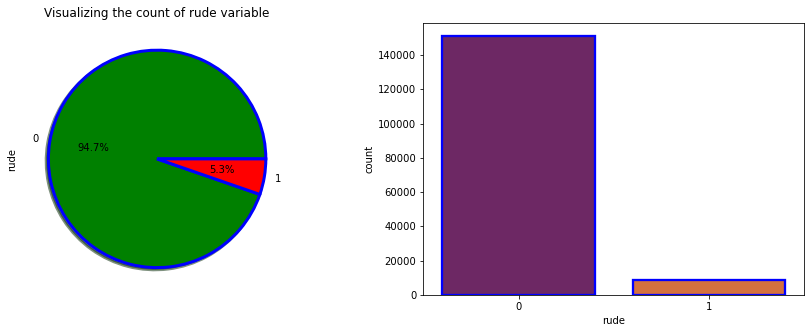

In [43]:
# Visualizing count of rude and normal comments
print(train_df['rude'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["g", "r"]
train_df['rude'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                         wedgeprops = {'linewidth':3, 'edgecolor':'b'},
                                                     colors=colors,title = 'Visualizing the count of rude variable')
ax = sns.countplot('rude', data=train_df, ax=ax[1],palette="inferno",linewidth=2.3, edgecolor="b")
plt.show()

#### Observations:
The count of rude comments are high compared to normal comments. Around 94% of the comments are falls down into rude and remaining considered to be normal comments.

0    159093
1       478
Name: threat, dtype: int64


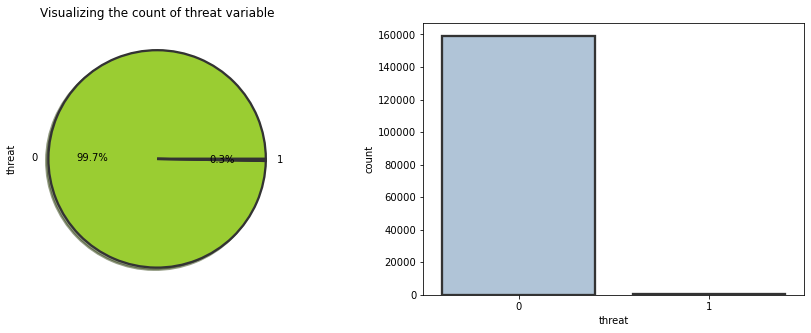

In [44]:
# Visualizing count of threat and normal comments
print(train_df['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["yellowgreen", "b"]
train_df['threat'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                           wedgeprops = {'linewidth':2.3, 'edgecolor':'.2'},
                                                     colors=colors,title = 'Visualizing the count of threat variable')
ax = sns.countplot('threat', data=train_df, ax=ax[1],palette="BuPu",linewidth=2.3, edgecolor=".2")
plt.show()

#### Observations:
Here also 99.7% of the comments are threat and only 0.3% of the comments are look normal.

0    159093
1       478
Name: threat, dtype: int64


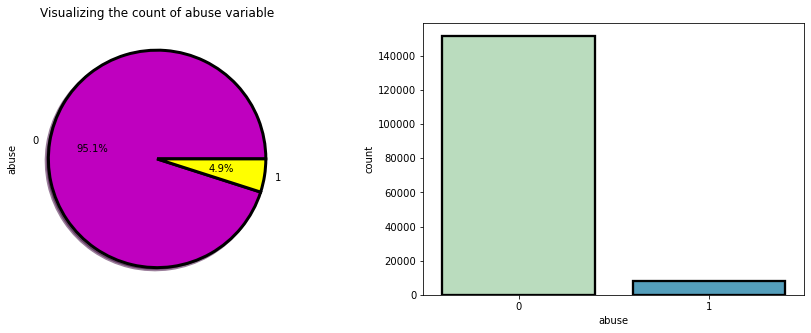

In [45]:
# Visualizing count of abuse and normal comments
print(train_df['threat'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["m", "yellow"]
train_df['abuse'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':3, 'edgecolor':'k'}, colors=colors,
                                          title = 'Visualizing the count of abuse variable')
ax = sns.countplot('abuse', data=train_df, ax=ax[1],palette="GnBu",linewidth=2.3, edgecolor="k")
plt.show()

#### Observations:
The count of abusing type comments are high which has 95.1% and only 4.9% of the comments are normal.

0    158166
1      1405
Name: loathe, dtype: int64


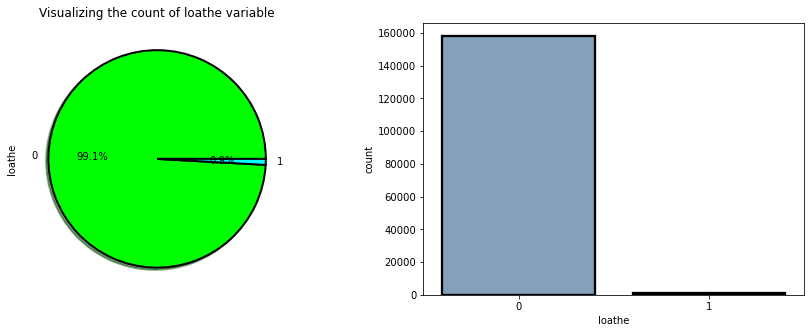

In [46]:
# Visualizing count of loathe and normal comments
print(train_df['loathe'].value_counts())
f,ax=plt.subplots(1,2,figsize=(15,5))
labels = ['0', '1']
colors = ["lime", "cyan"]
train_df['loathe'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=10,
                                                     wedgeprops = {'linewidth':2, 'edgecolor':'k'}, colors=colors,
                                           title = 'Visualizing the count of loathe variable')
ax = sns.countplot('loathe', data=train_df, ax=ax[1],palette="twilight_shifted",linewidth=2.3, edgecolor="k")
plt.show()

### Observations:
The count of loathe is high compared to normal text comments.


### Distribution of skewness

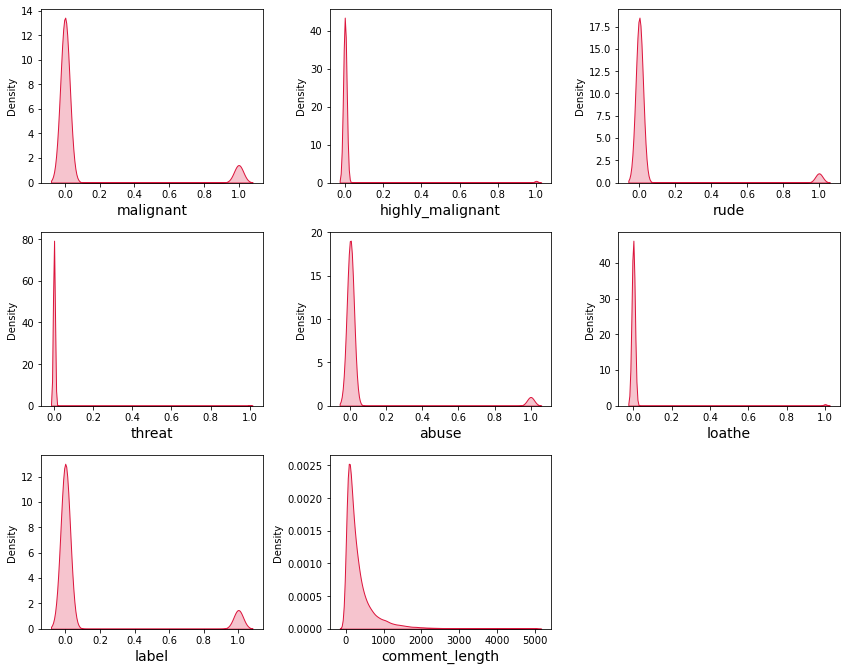

In [47]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(12,12),facecolor='white')
plotnumber=1
for column in train_df.drop(['comment_text'],axis=1):
    if plotnumber<=8:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(train_df[column],color="crimson",hist=False, kde_kws={"shade": True})
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.tight_layout()

#### Observations:
From the distribution plots we can notice that all the columns are skewned to right except comment_label column. Since all the columns are categorical in nature there is no need to remove skewness and outliers in any of the columns.

### Text Pre-Processing
Using the text preprocessing techniques we can remove noise from raw data and makes raw data more valuable for building models. Pre-processing involves the followinf steps, but these will be performed in a slightly different manner:

Removing Punctuations and other special characters

Splitting the comments into individual words

Removing Stop Words

Stemming and Lemmatising

Splitting dataset into Training and Testing

The string library contains punctuation characters. This is imported and all numbers are appended to this string. From the value count functions we have seen that our comment_text feature contains strings such as won't, didn't, etc which contain apostrophe character('). To prevent these words from being converted to wont/didnt, the character ' represented as \' in escape sequence notation is replaced by empty character in the punctuation string.

In [48]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

Converting all our text into the lower case is a simple and most effective approach. If we are not applying lower case conversion on words like NLP, nlp, Nlp, we are treating all these words as different words/tokens. It is better to perform lower case the text as the first step in this text preprocessing. Because if we are trying to remove stop words all words need to be in lower case.

In [49]:
# Replacing '\n' in comment_text
train_df['comment_text'] = train_df['comment_text'].replace('\n',' ')

In [50]:
# Convert all comment texts to lower case in train dataset
train_df['comment_text'] = train_df['comment_text'].str.lower()
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::and for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,you should be ashamed of yourself \n\nthat is ...,0,0,0,0,0,0,0,99
159568,"spitzer \n\numm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


In [51]:
# Replacing '\n' in comment_text
test_df['comment_text'] = test_df['comment_text'].replace('\n',' ')

# Convert all comment texts to lower case in test dataset
test_df['comment_text'] = test_df['comment_text'].str.lower()
test_df

,id,comment_text,comment_length
0,00001cee341fdb12,yo bitch ja rule is more succesful then you'll...,367
1,0000247867823ef7,== from rfc == \n\n the title is fine as it is...,50
2,00013b17ad220c46,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,00017563c3f7919a,":if you have a look back at the source, the in...",205
4,00017695ad8997eb,i don't anonymously edit articles at all.,41
...,...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu...",60
153160,fffd7a9a6eb32c16,== throw from out field to home plate. == \n\n...,198
153161,fffda9e8d6fafa9e,""" \n\n == okinotorishima categories == \n\n i ...",423
153162,fffe8f1340a79fc2,""" \n\n == """"one of the founding nations of the...",502


I have converted comments into lower case using the above coding in both train and test data.

Now I am going to clean the data by removing/replacing URLs, Numbers, punctuations, converting numbers to words etc. We can also observe special characters at the top of the common letter or characters if we press a longtime while typing, for example, résumé. If we are not removing these types of noise from the text, then the model will consider resume and résumé; both are two different words. So, I am replacing them as well. Also, removing extra white spaces is also important. We can not get any information from extra spaces, so that we can ignore all additional spaces such as 0ne or more newlines, tabs, extra spaces.

In [52]:
# Cleaning data in train dataset
# Replace email addresses with "email"
train_df["comment_text"] = train_df["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
train_df["comment_text"]=train_df["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
train_df["comment_text"] = train_df["comment_text"].str.replace(r'£|\$','dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
train_df["comment_text"] = train_df["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replace numbers with 'numbr'
train_df["comment_text"] = train_df["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
train_df["comment_text"] = train_df["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
train_df["comment_text"] = train_df["comment_text"].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
train_df["comment_text"] = train_df["comment_text"].str.replace(r'^\s+|\s+?$', '')

### Removing of Stopwords

Stopwords are common words and irrelevant words from which we can't get any useful information for our model or problem statement.

Few stopwords are "a", "an", "the", etc. Single letter words if existing or created due to any preprocessing step do not convey any useful meaning and hence can be directly removed. Hence letters from b to z, will be added to the list of stop words imported directly.

### Stemming and Lemmatization

Stemming is the process of converting inflected/derived words to their word stem or the root form. Basically, a large number of similar origin words are converted to the same word.E.g. words like "stems", "stemmer", "stemming", "stemmed" as based on "stem". This helps in achieving the training process with a better accuracy.

Lemmatizing is the process of grouping together the inflected forms of a word so they can be analysed as a single item. This is quite similar to stemming in its working but differs since it depends on correctly identifying the intended part of speech and meaning of a word in a sentence, as well as within the larger context surrounding that sentence, such as neighboring sentences or even an entire document.

The wordnet library in nltk will be used for this purpose. Stemmer and Lemmatizer are also imported from nltk.

In [53]:
# Remove stopwords
stop_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

train_df["comment_text"] = train_df["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stop_words))
lem=WordNetLemmatizer()
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: ' '.join(lem.lemmatize(t) for t in x.split()))

#### Performing the above processing steps for test data as well.

In [54]:
# Cleaning data in test dataset
# Replace email addresses with "email"
test_df["comment_text"] = test_df["comment_text"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
test_df["comment_text"] = test_df["comment_text"].str.replace(r'^https\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
test_df["comment_text"] = test_df["comment_text"].str.replace(r'£|\$','dollers')

# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
test_df["comment_text"] = test_df["comment_text"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')

# Replace numbers with 'numbr'
test_df["comment_text"] = test_df["comment_text"].str.replace(r'\d+(\.\d+)?','numbr')

# Remove punctuation
test_df["comment_text"] = test_df["comment_text"].str.replace(r'[^\w\d\s]', ' ')

# Replace whitespace between terms with a single space
test_df["comment_text"] = test_df["comment_text"].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
test_df["comment_text"] = test_df["comment_text"].str.replace(r'^\s+|\s+?$', '')

In [55]:
stp_words = set(stopwords.words('english') + ['u','ü','ur','4','2','im','dont','doin','ure'])

test_df["comment_text"] = test_df["comment_text"].apply(lambda x:' '.join(term for term in x.split() 
                                                                            if term not in stp_words))
lemma=WordNetLemmatizer()
test_df['comment_text'] = test_df['comment_text'].apply(lambda x: ' '.join(lemma.lemmatize(t) for t in x.split()))

We have successfully completed cleaning and pre-processing the data in both train and test datasets.

In [56]:
# New column (clean_length) after removing punctuations, stopwords in train dataset
train_df['clean_length'] = train_df.comment_text.str.len()
train_df


,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,168
1,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,91
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,365
4,sir hero chance remember page,0,0,0,0,0,0,0,67,29
...,...,...,...,...,...,...,...,...,...,...
159566,second time asking view completely contradicts...,0,0,0,0,0,0,0,295,178
159567,ashamed horrible thing put talk page numbr numbr,0,0,0,0,0,0,0,99,48
159568,spitzer umm there actual article prostitution ...,0,0,0,0,0,0,0,81,65
159569,look like actually put speedy first version de...,0,0,0,0,0,0,0,116,56


In [57]:
# New column (clean_length) after removing punctuations, stopwords in test dataset
test_df['clean_length'] = test_df.comment_text.str.len()
test_df

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


I have created new column "clean_length" in both train and test dataset after cleaning the data. We can see that nearly half of the text has been removed from the comment_text after using required pre-processing

In [58]:
# Total length removal in train data
print('Original Length:',train_df.comment_length.sum())
print('Clean Length:',train_df.clean_length.sum())
print("Total Words Removed:", (train_df.comment_length.sum()) - (train_df.clean_length.sum()))

Original Length: 62893130
Clean Length: 39965479
Total Words Removed: 22927651


Above are the total length of train dataset before and after cleaning data. And the total words removed after preprocessing.

### Plotting WordCloud for each label

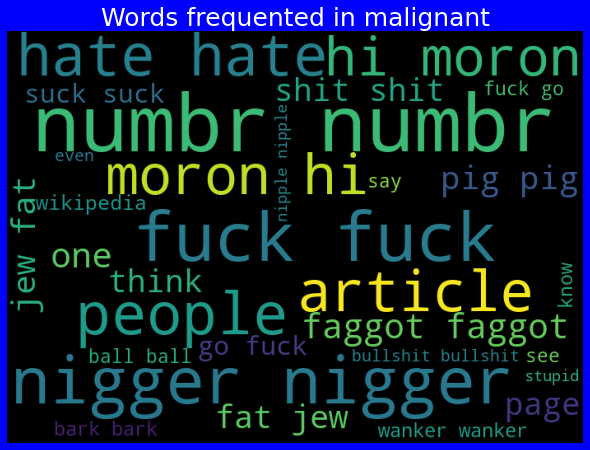

In [59]:
# Getting sense of loud words in malignant
from wordcloud import WordCloud

# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
malignants = train_df['comment_text'][train_df['malignant']==1]

malignant_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(malignants))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in malignant",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

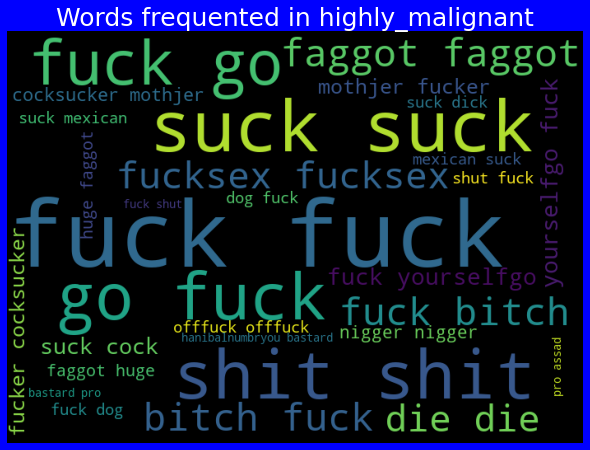

In [60]:
# Getting sense of loud words in highly malignant

# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
highly_malignants = train_df['comment_text'][train_df['highly_malignant']==1]

high_malignant_cloud = WordCloud(width=700,height=500,background_color='black',
                                 max_words=30).generate(' '.join(highly_malignants))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(high_malignant_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in highly_malignant",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

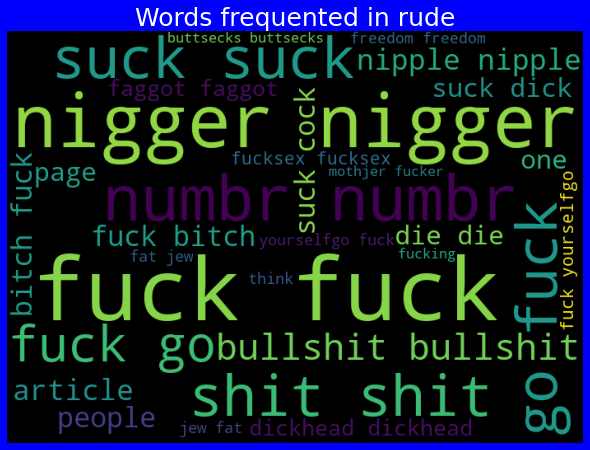

In [61]:
# Getting sense of loud words in rude
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
rude_text = train_df['comment_text'][train_df['rude']==1]

rude_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(rude_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(rude_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in rude",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

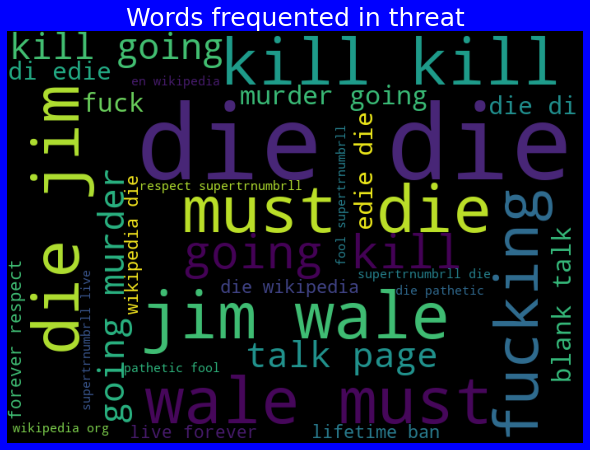

In [62]:
# Getting sense of loud words in threat
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
threats = train_df['comment_text'][train_df['threat']==1]

threat_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(threats))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(threat_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in threat",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

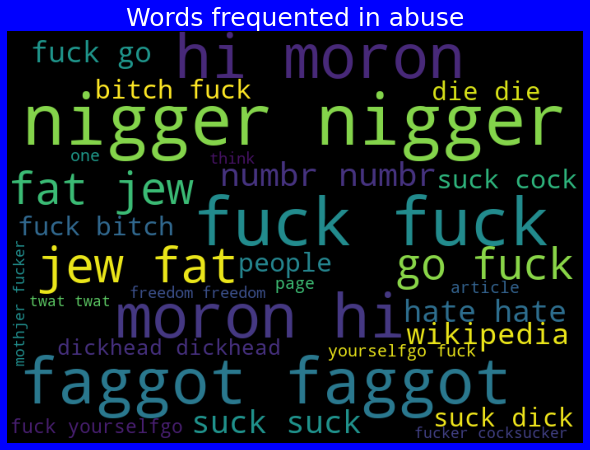

In [63]:
# Getting sense of loud words in abuse
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
abuse_text = train_df['comment_text'][train_df['abuse']==1]

abuse_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(abuse_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(abuse_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in abuse",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

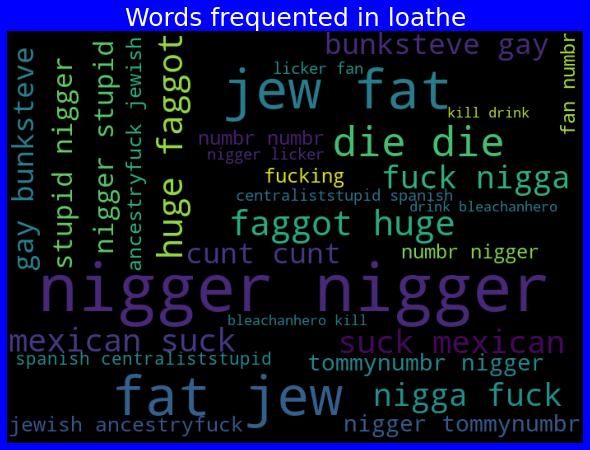

In [64]:
# Getting sense of loud words in loathe
# Print only rows where the toxic category label value is 1 (ie. the comment is toxic)
loathe_text = train_df['comment_text'][train_df['loathe']==1]

loathe_cloud = WordCloud(width=700,height=500,background_color='black',max_words=30).generate(' '.join(loathe_text))

plt.figure(figsize=(8,6),facecolor='b')
plt.imshow(loathe_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label = "Words frequented in loathe",fontdict={'fontsize':25, 'color':'white'} )
plt.show()

#### Observations:
From the above plots we can clearly see the toxic words which are indication of malignant, highly malignant, rude, threat, abuse and loathe words.
Here most frequent words used for each label is displayed in the word cloud based on different label and also when all the values are present.

### Checking for correlation in train dataset

In [65]:
# Checking the correlation between features and the target
cor = train_df.corr()
cor

,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,clean_length
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009,0.967748,-0.054413,-0.052320
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600,0.298666,0.010175,0.014264
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867,0.702812,-0.042910,-0.039608
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128,0.162925,-0.007917,-0.010046
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736,0.677324,-0.045027,-0.042405
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000,0.280144,-0.013628,-0.008146
label,0.967748,0.298666,0.702812,0.162925,0.677324,0.280144,1.000000,-0.051643,-0.050171
comment_length,-0.054413,0.010175,-0.042910,-0.007917,-0.045027,-0.013628,-0.051643,1.000000,0.987267
clean_length,-0.052320,0.014264,-0.039608,-0.010046,-0.042405,-0.008146,-0.050171,0.987267,1.000000


This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

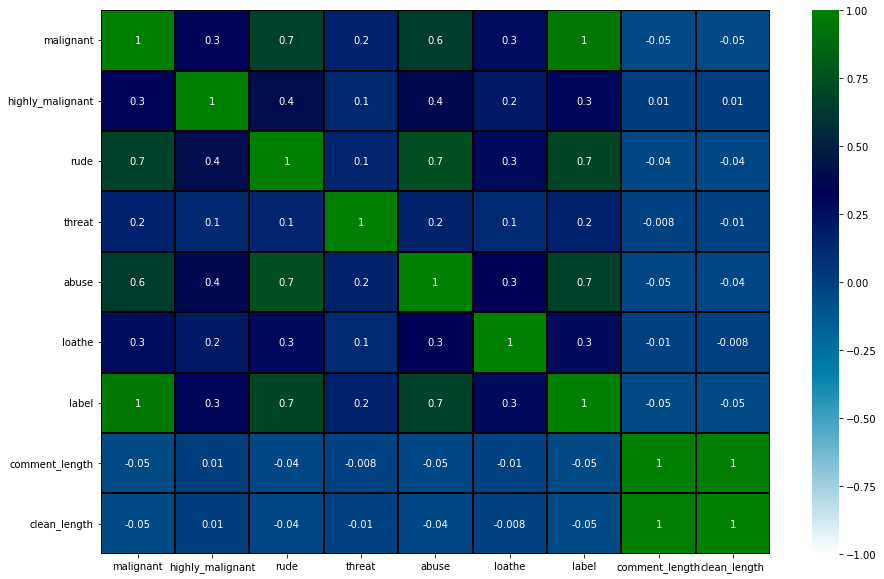

In [66]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(15,10))    
sns.heatmap(train_df.corr(),linewidths=.1,vmin=-1, vmax=1,fmt='.1g',linecolor="black",annot=True,cmap="ocean_r",
            annot_kws={'size':10})
plt.yticks(rotation=0);

This heatmap shows the correlation matrix of the data. We can observe the relation between one feature to other and relation between features and label.

From the heat map we can observe the features have some strong relation with each other. We can also observe multicollinearity problem.

I have successfully completed cleaning data. Let's use TF-IDF vactorizer, it'll help to transform the text data to feature vector which can be used as input in our modelling. It is a common algorithm to transform text into numbers. It measures the originality of a word by comparing the frequency of appearance of a word in a document with the number of documents the words appear in.

### Separating features and label into X and y

### Converting tokens into vectors for moving forward to build machine learning model.

In [67]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features=15000,stop_words='english')

In [68]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(train_df['comment_text'])

y = train_df['label']

# Checking shape of X and y
print("Shape of x: ",X.shape)
print("Shape of y: ",y.shape)

Shape of x:  (159571, 15000)
Shape of y:  (159571,)


In [69]:
# Doing the same process for test data 
x = tf_vec.fit_transform(test_df['comment_text'])
x.shape

(153164, 15000)

I have converted features into number tokens in both train and test datasets. And separated input and output variables.

# Model Building

### Splitting train and test data

In [70]:
# Splitting training and testing data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

I am taking 30% of the complete dataset for training purpose and the remaining 70% be used to train the machine learning models using the random state as 42.

In [71]:
# Checking the dimension of train and test after splitting
print(x_train.shape,'\t',x_test.shape)        # Shape of x data
print(y_train.shape,'\t',y_test.shape)        # Shape of y data

(111699, 15000) 	 (47872, 15000)
(111699,) 	 (47872,)


Checked the dimension of both train and test data after splitting them.

### Balancing data using oversampling technique

From the visualization we have seen there is class imbalance issue, let's balance the data using oversampling method.

In [72]:
# Importing the Oversampling library and Counter
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

In [73]:
# We are trying to increase the points of minimum label data
OS = RandomOverSampler(0.75)
train_x,train_y = OS.fit_resample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(train_y)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100342, 1: 75256})


I am using RandomOverSampler method to ensure that all the categories present in our label data have the same value. After applying oversampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [74]:
# Creating instances for different Classifiers

LR = LogisticRegression()
MNB = MultinomialNB()
lgbm = LGBMClassifier()
GB = GradientBoostingClassifier()
SVC = LinearSVC()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier()
xgb = XGBClassifier(verbosity=0)

# Creating a list model where all the models will be appended for further evaluation in loop.
models=[]
models.append(('LogisticRegression',LR))
models.append(('MultinomialNB',MNB))
models.append(('LGBMClassifier',lgbm))
models.append(('GradientBoostingClassifier',GB))
models.append(('LinearSVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('AdaBoostClassifier',ABC))
models.append(('XGBClassifier',xgb))

I have created 8 different classification algorithms and are appended in the variable models. Now, let's run a for loop which contains the accuracy of the models along with different evaluation metrics.

In [75]:
# Creating empty lists
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
lg_loss=[]
Hamming_loss=[]

for name,model in models:
    print("**********",name,"**********")
    print("\n")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    y_pred=model.predict(x_test)
# Accuracy Score
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy_Score: ',acc_score)
    Acc_score.append(acc_score*100)
# Model Score
    score=model.score(train_x,train_y)
    print('Learning Score : ',score)
    Score.append(score*100)
# Cross Validation Score
    cv=cross_val_score(model,X,y,cv=5,scoring='accuracy').mean()
    print('Cross Validation Score: ',cv)
    cvs.append(cv*100)
# Auc Roc Score
    roc_auc= roc_auc_score(y_test,y_pred)
    print('roc_auc_score: ',roc_auc)
    rocscore.append(roc_auc*100)
# Log Loss
    loss = log_loss(y_test,y_pred)
    print('Log loss : ', loss)
    lg_loss.append(loss) 
# Hamming loss
    ham_loss = hamming_loss(y_test,y_pred)
    print("Hamming loss: ", ham_loss)
    Hamming_loss.append(ham_loss)
    print('\n')
# Confusion Matrix
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print("\n")
# Classification Report
    print('Classification Report:\n ')
    print(classification_report(y_test,y_pred))
    print("******************************************************************************")
    print('\n\n')

********** LogisticRegression **********


LogisticRegression()
Accuracy_Score:  0.9446858288770054
Learning Score :  0.9519299764234217
Cross Validation Score:  0.9559318382393636
roc_auc_score:  0.895160256059955
Log loss :  1.9105144375628327
Hamming loss:  0.05531417112299465


Confusion matrix: 

[[41169  1835]
 [  813  4055]]


Classification Report:
 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     43004
           1       0.69      0.83      0.75      4868

    accuracy                           0.94     47872
   macro avg       0.83      0.90      0.86     47872
weighted avg       0.95      0.94      0.95     47872

******************************************************************************



********** MultinomialNB **********


MultinomialNB()
Accuracy_Score:  0.9110335895721925
Learning Score :  0.9145946992562558
Cross Validation Score:  0.9463499000343936
roc_auc_score:  0.8860844249301454
Log loss :  3.0728502848

After running the for loop, we can able to observe the accuracy, loss and evaluation metrics of all the models.

### Plotting ROC and compare AUC for all the models used

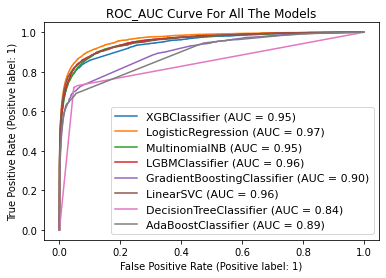

In [76]:
# Plotting for all the models used here
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(xgb,x_test,y_test)     # ax_=Axes with confusion matrix
plot_roc_curve(LR, x_test, y_test, ax=disp.ax_)
plot_roc_curve(MNB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(lgbm, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GB, x_test, y_test, ax=disp.ax_)
plot_roc_curve(SVC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(DTC, x_test, y_test, ax=disp.ax_)
plot_roc_curve(ABC, x_test, y_test, ax=disp.ax_)
plt.title("ROC_AUC Curve For All The Models")
plt.legend(prop={'size':11}, loc='lower right')
plt.show()

I have generated the ROC Curve for all the models used here and it shows the AUC score for the models.

### Model Selection

In [77]:
# Displaying Scores and metrics:
Results=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Validation Score':cvs,
                     'Auc_Roc_Score':rocscore,'Log_Loss':lg_loss,'Hamming_loss':Hamming_loss}) 
Results

,Model,Learning Score,Accuracy Score,Cross Validation Score,Auc_Roc_Score,Log_Loss,Hamming_loss
0,LogisticRegression,95.192998,94.468583,95.593184,89.516026,1.910514,0.055314
1,MultinomialNB,91.459470,91.103359,94.634990,88.608442,3.072850,0.088966
2,LGBMClassifier,90.578480,94.723429,95.548689,86.670293,1.822486,0.052766
3,GradientBoostingClassifier,82.959373,94.332804,94.030244,79.384694,1.957393,0.056672
4,LinearSVC,97.079693,93.948446,95.924071,88.561599,2.090166,0.060516
5,DecisionTreeClassifier,99.808654,92.862216,94.020216,83.666912,2.465338,0.071378
6,AdaBoostClassifier,84.387066,92.245989,94.577336,81.493117,2.678176,0.077540
7,XGBClassifier,90.918461,94.917697,95.360059,85.430368,1.755384,0.050823


After creating and training different classification algorithms, we can see that the difference between accuracy and cross validation score is less for "Extreme Gradient Boosting Classifier (XGBClassifier)" and Gradient Boosting Classifier. But, XGBClassifier giving less loss values, auc roc score and high accuracy score compared to Gradient Boosting Classifier. On this basis I can conclude that "XGBClassifier" as the best fitting model. Now, we will try Hyperparameter Tuning to find out the best parameters and using them to improve the scores and metrics values.

## Hyper Parameter Tuning

In [78]:
# Let's Use the GridSearchCV to find the best paarameters in XGBClassifier

# Extreme XGBClassifier
parameters = {'n_estimators':[100,1000],
              'booster':['gbtree'],
              'max_depth':[2,6],
              'eta':[0,0.2,0.3],
              'colsample_bytree':[1,0.8]}

# Running GridSearchCV for the model Bagging Regressor.
GCV=GridSearchCV(XGBClassifier(),parameters,cv=5,scoring='accuracy')

In [79]:
# Training the best model
GCV.fit(train_x,train_y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'booster': ['gbtree'], 'colsample_bytree': [1, 0.8],
                         'eta': [0, 0.2, 0.3], 'max_depth': [2, 6],
                         'n_estimators': [100, 1000]},
             scoring='accuracy')

I Have used 5 XGBClassifier parameters to be saved under the variable "parameters" that will be used in GridSearchCV for finding the best output. Assigned a variable to the GridSearchCV function after entering all the necessary inputs. And we used our training data set to make the GridSearchCV aware of all the hyper parameters that needs to be applied on our best model.

In [80]:
#Getting best parameters
GCV.best_params_

{'booster': 'gbtree',
 'colsample_bytree': 1,
 'eta': 0.3,
 'max_depth': 6,
 'n_estimators': 1000}

These are the best parameters obtained after running GridSearchCV.

### Creating final model

In [81]:
# Creating final model 
comment_model = XGBClassifier(n_estimators=1000, max_depth=6, eta=0.3, colsample_bytree=1, booster='gbtree')
comment_model.fit(train_x, train_y)
pred = comment_model.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score:", acc_score*100)
roc_auc = roc_auc_score(y_test,y_pred)
print('roc_auc_score: ',roc_auc*100)
print('Log loss : ', log_loss(y_test,pred))
print("Hamming loss: ", hamming_loss(y_test,pred))
print("\n")
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('\n')
print('Classification Report:','\n',classification_report(y_test,pred))

Accuracy score: 95.59032419786097
roc_auc_score:  85.43036775467257
Log loss :  1.5230656030029706
Hamming loss:  0.044096758021390375


Confusion Matrix: 
 [[41954  1050]
 [ 1061  3807]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     43004
           1       0.78      0.78      0.78      4868

    accuracy                           0.96     47872
   macro avg       0.88      0.88      0.88     47872
weighted avg       0.96      0.96      0.96     47872



I have successfully incorporated the hyper parameter tuning using best parameters of XGBClassifier and the accuracy of the model has been increased after hyperparameter tuning and received the accuracy score as 95.47% which is very good.

### Confusion Matrix

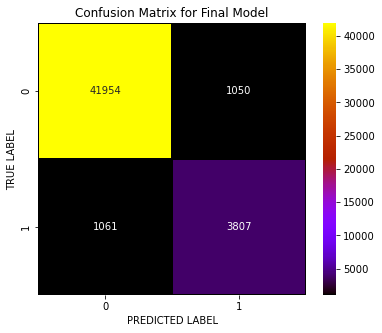

In [82]:
# Plot confusion matrix heatmap
cm = confusion_matrix(y_test,pred)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f , ax = plt.subplots(figsize=(6,5))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="gnuplot",
            xticklabels=x_axis_labels,yticklabels=y_axis_labels)

plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Final Model')
plt.show()

With the help of confusion matrix we can able to see actual and predicted values for the final model. And also we can understand the number of times we got the correct outputs and the number of times my model missed to provide the correct prediction

### Plotting ROC and Compare AUC for the Final model

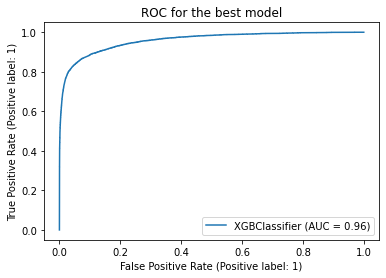

In [83]:
plot_roc_curve(comment_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 96% which is increased after tuning the model.

### Saving The Model

In [84]:
# Saving the model using .pkl
import joblib
joblib.dump(comment_model,"Malignant_Comments_Classification(IP6).pkl")

['Malignant_Comments_Classification(IP6).pkl']

I am using the joblib option to save the final classification model in the form of .pkl.

In [85]:
# Predicting the trained final model
comment_model.predict(X)

array([0, 0, 0, ..., 0, 0, 0])

In [86]:
# loading the final model
model = joblib.load('Malignant_Comments_Classification(IP6).pkl')

I have loaded my saved model to use further and to get the predictions for test data.

### Prediction for test dataset using final model

In [87]:
# Lets load the test data set
test_df

,id,comment_text,comment_length,clean_length
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227
1,0000247867823ef7,rfc title fine imo,50,18
2,00013b17ad220c46,source zawe ashton lapland,54,26
3,00017563c3f7919a,look back source information updated correct f...,205,109
4,00017695ad8997eb,anonymously edit article,41,24
...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319


I have loaded my cleaned test dataframe. Now, we will predict the values for test data.

In [88]:
# Predicting the values for test data after loading trained model
Predictions = model.predict(x)
Predictions

array([0, 0, 0, ..., 0, 1, 0])

These are the predicted values for test data.

In [89]:
# Adding the predicted values to test dataframe
test_df['Predicted_Values']=Predictions
test_df

,id,comment_text,comment_length,clean_length,Predicted_Values
0,00001cee341fdb12,yo bitch ja rule succesful ever whats hating s...,367,227,0
1,0000247867823ef7,rfc title fine imo,50,18,0
2,00013b17ad220c46,source zawe ashton lapland,54,26,0
3,00017563c3f7919a,look back source information updated correct f...,205,109,0
4,00017695ad8997eb,anonymously edit article,41,24,0
...,...,...,...,...,...
153159,fffcd0960ee309b5,totally agree stuff nothing long crap,60,37,0
153160,fffd7a9a6eb32c16,throw field home plate get faster throwing cut...,198,107,0
153161,fffda9e8d6fafa9e,okinotorishima category see change agree corre...,423,238,0
153162,fffe8f1340a79fc2,one founding nation eu germany law return quit...,502,319,1


Here I have added new predicted values to test dataframe. Using classification model, we have got the predicted values of malignant comments.

In [90]:
# Checking values counts for predicted values
test_df.Predicted_Values.value_counts()

0    133425
1     19739
Name: Predicted_Values, dtype: int64

In [91]:
# Saving the data into csv file
test_df.to_csv("Malignant_Comments_Predicted_Test_Data.csv",index=False)

Finally, saving my test data into csv file.

#### Conclusion
This case study gives an idea of NLP text processing in machine learning. In this case study, apart from applying the techniques that we have learnt in the EDA module, we also classified hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

From this dataset we were able to understand the idea of Natural Language Processing using machine learning models. This model helps us to understand whether the online comments are malignat or non malignant.

First we loaded the dataset and have done data cleaning, EDA and text pre-processing techniques like
Feature engineering

Removing Punctuations and other special characters

Splitting the comments into individual words

Removing Stop Words

Stemming and Lemmatising

Checking correlation and scaling and got better insights from the data visualizations.

Then we did the model training, building the model and finding out the best model on the basis of different metrices like Accuracy Score, Cross Validation Score, roc_auc_score, precision, recall, f1score, log loss and hamming loss. We have created 8 different models. A Result table is made which is comprises of accuracy,cross validation score,auc roc score,learning scores, log loss and hamming loss of each model. Plotted AUC ROC curve for all the models combiningly.

We got XGBClassifier as the best model among all the models as it was giving least difference of accuracy and cv score, and loss also very less compared to other models. On this basis we performed the Hyperparameter tuning to finding out the best parameter and improving the scores. The accuracy score increased after tuning. So we concluded that XGBClassifier as the best algorithm as it was giving high accuracy and AUC after tuning.

After that we saved the model in a pickle with a filename in order to use whenever we require. Then we loaded the saved file and predicted the values for test data. Further we saved the predicted values test data into csv file.

Finally, we achieved our goal by building a prototype of online hate and abuse comment classifier.